In [2]:
import pandas as pd

In [4]:
data=pd.read_csv("carprices.csv")
data

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [14]:
data.rename({"Mileage":"mil","Age(yrs)":"age","Sell Price($)":"sellprice"},axis="columns",inplace=True)
data

,mil,age,sellprice
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [16]:
x=data[["mil","age"]]

In [19]:
y=data[["sellprice"]]

In [21]:
import matplotlib.pyplot as plt

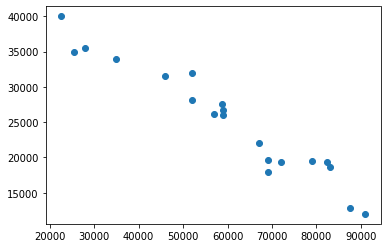

In [24]:
plt.scatter(x["mil"],y)

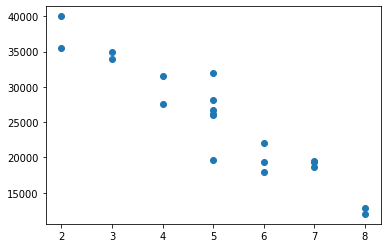

In [25]:
plt.scatter(x["age"],y)

In [13]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [39]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
df=pd.DataFrame([[lr.predict(x_test)],[y_test]]).T
df

,0,1
0,"[[36821.97158073014], [25049.766471492894], [1...",sellprice 16 35500 13 27500 10 ...


In [52]:
lr.score(x_test,y_test)

0.8952313707966283

In [53]:
import numpy as np

In [73]:
x=list(lr.predict(x_test))
y=list((y_test).T)
x,y

([array([36821.97158073]),
  array([25049.76647149]),
  array([16127.86692079]),
  array([30136.38586493])],
 [16, 13, 10, 4])

In [75]:
d=pd.DataFrame([[x,y]],columns=["predicted value","exact value"])
d

,predicted value,exact value
0,"[[36821.97158073014], [25049.766471492894], [1...","[16, 13, 10, 4]"


In [74]:
x

[array([36821.97158073]),
 array([25049.76647149]),
 array([16127.86692079]),
 array([30136.38586493])]

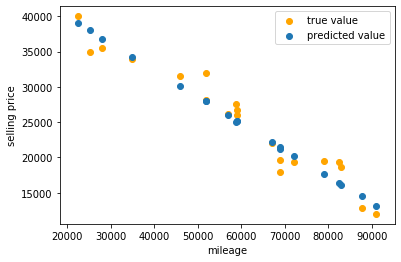

In [81]:
plt.xlabel("mileage",size=10)
plt.ylabel("selling price",size=10)
plt.scatter(data[["mil"]],data["sellprice"],color="orange",label="true value")
plt.scatter(data["mil"],lr.predict(data[["mil","age"]]),label="predicted value")
plt.legend()

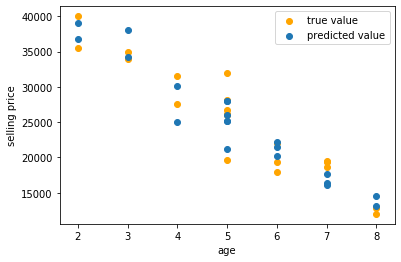

In [86]:
plt.xlabel("age",size=10)
plt.ylabel("selling price",size=10)
plt.scatter(data[["age"]],data["sellprice"],color="orange",label="true value")
plt.scatter(data["age"],lr.predict(data[["mil","age"]]),label="predicted value")
plt.legend()